In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv("heart.csv")

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
data.groupby('sex').size()

sex
0    312
1    713
dtype: int64

In [9]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

# EDA

<function matplotlib.pyplot.show(close=None, block=None)>

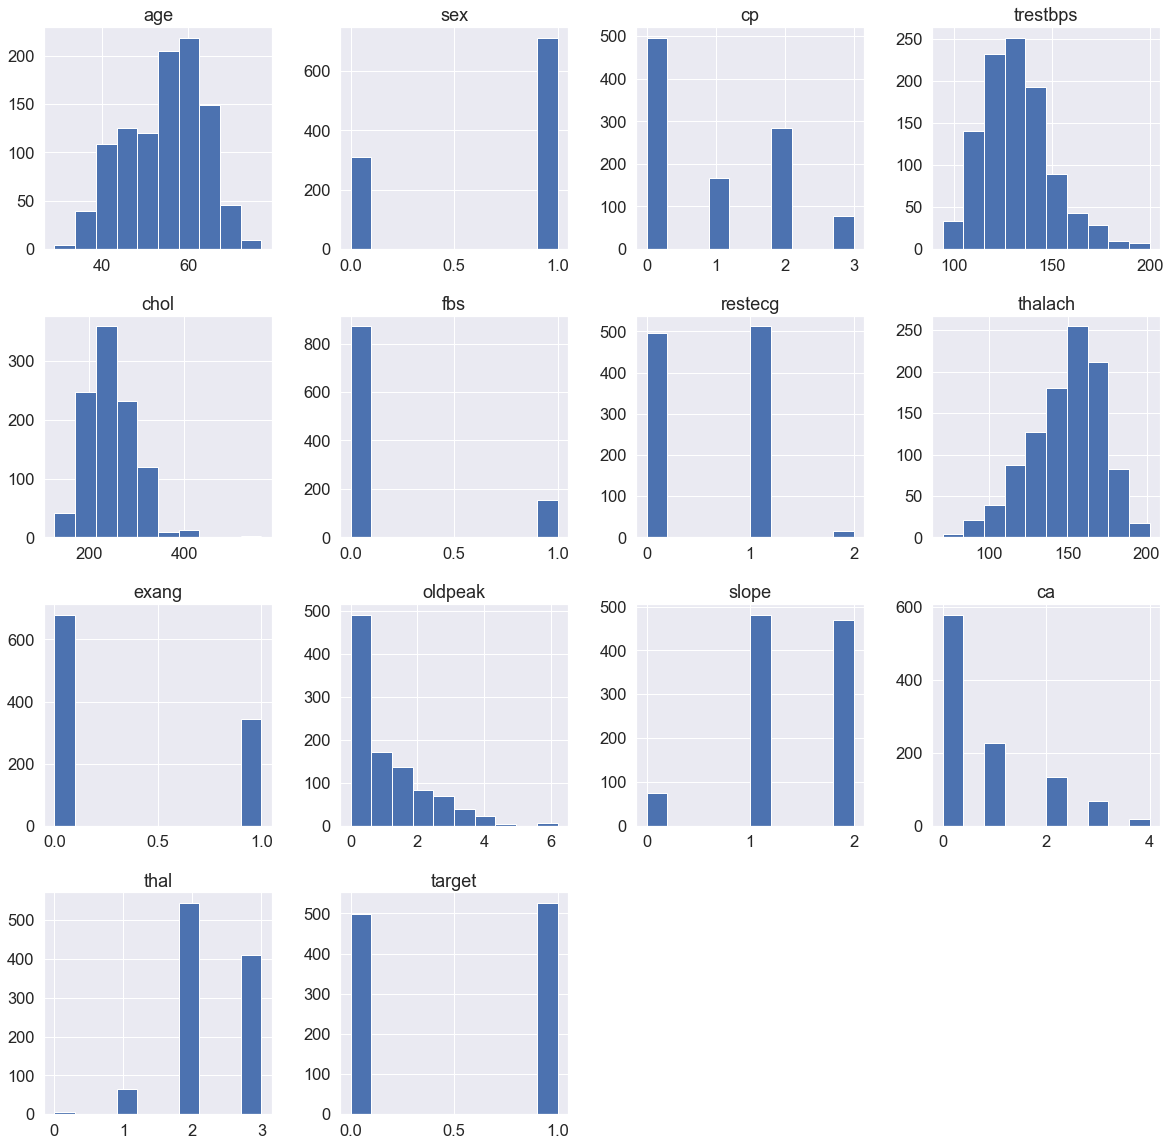

In [20]:
sns.set(font_scale=1.5)
data.hist(figsize = (20,20))
plt.show

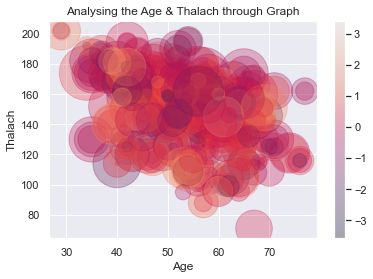

In [12]:
sns.set(font_scale=1)
x = data['age']
y = data['thalach']
colors = np.random.randn(1025)
sizes = 1000 * np.random.randn(1025)

plt.scatter(x,y, c = colors, s= sizes, alpha = 0.3)
plt.colorbar()
plt.colormaps()
plt.title('Analysing the Age & Thalach through Graph')
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.show()


<AxesSubplot:title={'center':'Checking the Null Values'}>

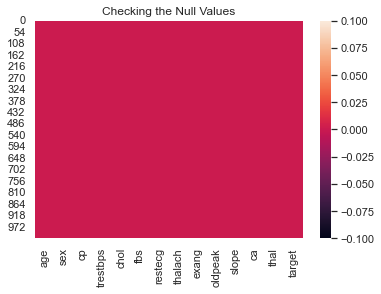

In [13]:
plt.title('Checking the Null Values')
sns.heatmap(data.isnull())


sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64


Text(0, 0.5, 'target')

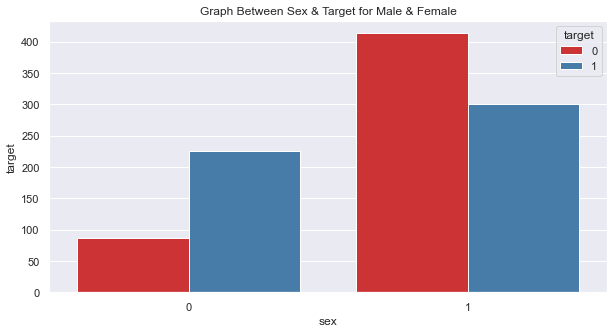

In [15]:
plt.figure(figsize=(10,5))

grouped = data.groupby("sex")["target"].value_counts()
print(grouped)

sns.countplot(x= "sex", hue= "target" , data=data, palette="Set1")
plt.title("Graph Between Sex & Target for Male & Female")
plt.ylabel("target")


<function matplotlib.pyplot.show(close=None, block=None)>

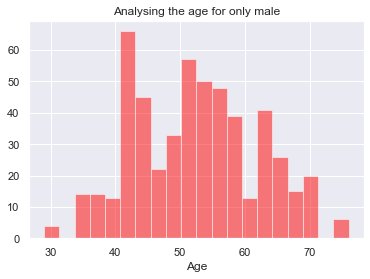

In [16]:

plt.hist(x= data.age[data.target==1], bins=20, alpha=0.5, histtype="bar" , color="red", )
plt.title("Analysing the age for only male")
plt.xlabel('Age')
plt.show

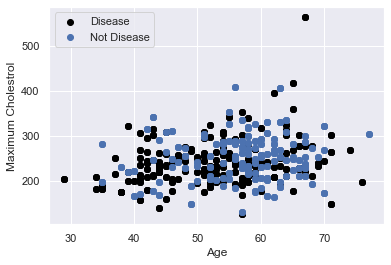

In [18]:
plt.scatter(x=data.age[data.target==1], y=data.chol[(data.target==1)], c="black")
plt.scatter(x=data.age[data.target==0], y=data.chol[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Cholestrol")
plt.show()


In [19]:
Male = len(data[data.sex==1])
Female = len(data[data.sex==0])
print("Males:", Male)
print("Females:", Female)


Males: 713
Females: 312


## ML

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics


In [21]:
arr = data.values

X = arr[:,0:-1]
y = arr[:,-1]
testing_size = 0.3
print(y)


[0. 0. 0. ... 0. 1. 0.]


In [22]:
X = data.drop(['target'], axis=1)
y = data['target']
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testing_size)
print(y_test)

860    0
287    1
920    0
255    1
268    0
      ..
945    1
959    1
17     0
273    0
648    1
Name: target, Length: 308, dtype: int64


In [25]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RT', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))

In [26]:
print(models)

[('DT', DecisionTreeClassifier()), ('RT', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('LR', LogisticRegression()), ('GNB', GaussianNB())]


In [27]:
names = []
results = []

In [28]:
for name, model in models:
    obj = model
    names.append(name)
    obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test)
    results.append(accuracy_score(y_test, y_pred)*100)
    print(results)


[98.7012987012987]
[98.7012987012987, 98.7012987012987]
[98.7012987012987, 98.7012987012987, 68.5064935064935]
[98.7012987012987, 98.7012987012987, 68.5064935064935, 86.03896103896103]
[98.7012987012987, 98.7012987012987, 68.5064935064935, 86.03896103896103, 80.51948051948052]


C:\Users\pk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<function matplotlib.pyplot.show(close=None, block=None)>

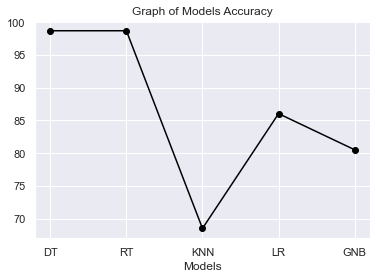

In [29]:
plt.plot(names, results, '-o', color= 'black')
plt.title("Graph of Models Accuracy")
plt.xlabel("Models")
plt.show

In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 


Accuracy: 0.8051948051948052


In [31]:
print("Precision:", metrics.precision_score(y_test, y_pred))

Precision: 0.7932960893854749


In [32]:
print("Recall:", metrics.recall_score(y_test, y_pred))

Recall: 0.8606060606060606


In [37]:
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: [[106  37]
 [ 23 142]]
